# Join (União)

* Unir tabelas com .merge

In [34]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [3]:
# Ler arquivo Countries
countries = gpd.read_file(r'C:\Users\iribarre\Downloads\3+-+Spatial+Operations\data\countries.shp')
countries.head(2)

,NAME,POP_EST,GDP_MD_EST,POP_YEAR,LASTCENSUS,GDP_YEAR,ECONOMY,INCOME_GRP,CONTINENT,REGION_UN,SUBREGION,geometry
0,Indonesia,260580739,3028000.0,2017,2010,2016,4. Emerging region: MIKT,4. Lower middle income,Asia,Asia,South-Eastern Asia,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4..."
1,Malaysia,31381992,863000.0,2017,2010,2016,6. Developing region,3. Upper middle income,Asia,Asia,South-Eastern Asia,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4..."


In [66]:
#Ler arquivo Conflict
conflicts = gpd.read_file(r'C:\Users\iribarre\Downloads\3+-+Spatial+Operations\data\acled2019.shp', rows=500)
conflicts.head(2)

,data_id,iso,event_id_c,event_id_n,event_date,year,time_preci,event_type,sub_event_,actor1,...,latitude,longitude,geo_precis,source,source_sca,notes,fatalities,timestamp,iso3,geometry
0,6768128,887,YEM45982,45982,31 December 2019,2019,1,Battles,Armed clash,Military Forces of Yemen (2012-),...,14.3541,47.0765,2,Yemen Data Project; Aden al Ghad; Al Janoob al...,Local partner-National,"On 31 December 2019, clashes reportedly erupte...",0,1580761030,YEM,POINT (47.07650 14.35410)
1,6768129,887,YEM45983,45983,31 December 2019,2019,1,Strategic developments,Change to group/activity,Military Forces of Yemen (2012-) Security Belt...,...,14.3541,47.0765,2,Al Janoob al Youm; Yemen Data Project,Local partner-National,"On 31 December 2019, forces loyal to the South...",0,1580761030,YEM,POINT (47.07650 14.35410)


In [12]:
# Essa tabela contém geometria e nomes abreviados
country_shapes = countries[['geometry', 'NAME']]
country_shapes.head(2)

,geometry,NAME
0,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4...",Indonesia
1,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4...",Malaysia


In [15]:
# Essa tabela contém as colunas Names e Population de Countries
country_names = countries[['NAME', 'POP_EST']]
country_names.head(2)

,NAME,POP_EST
0,Indonesia,260580739
1,Malaysia,31381992


In [17]:
# Unir (merge) country_shape com country_names em NAME column
country_gdf_merged = country_shapes.merge(country_names, on='NAME', how='left') #left quer dizer que  o output vai conter todas as linhas na tabela da esqueda
country_gdf_merged.head(2)

,geometry,NAME,POP_EST
0,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4...",Indonesia,260580739
1,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4...",Malaysia,31381992


As duas tableas, uma contendo dado geográfico e outra não, foram unidas através da coluna 'NAME'. 

In [20]:
# Unir (merge) country_shape com country_name através da coluna ISO_A3
country_df_merged = country_names.merge(country_shapes, on='NAME', how='left')
country_df_merged.head(2)

,NAME,POP_EST,geometry
0,Indonesia,260580739,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4..."
1,Malaysia,31381992,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4..."


As duas tabelas foram unidas. Isso é chamado de união de tabelas (table join) e não envolve dados geográficos. Envolve apenas atributos. 

# Spatial Join (União de Dados Geográficos)
* Unir dados geográficos com .sjoin

In [22]:
country_shapes.head(2)

,geometry,NAME
0,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4...",Indonesia
1,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4...",Malaysia


In [23]:
conflict_gdf = conflicts[['event_id_c', 'event_date', 'fatalities', 'geometry']]
conflict_gdf.head(2)

,event_id_c,event_date,fatalities,geometry
0,YEM45982,31 December 2019,0,POINT (47.07650 14.35410)
1,YEM45983,31 December 2019,0,POINT (47.07650 14.35410)


In [27]:
# Unir (merge) conflicts com country_names e population
conflicts_in_countries = gpd.sjoin(conflict_gdf, country_shapes, how='inner', op='within') 
conflicts_in_countries.sample(3)

C:\Users\iribarre\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3254: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


,event_id_c,event_date,fatalities,geometry,index_right,NAME
273,CAO2781,31 December 2019,0,POINT (9.30440 4.17490),145,Cameroon
33,SYR73184,31 December 2019,1,POINT (37.44640 36.61250),20,Syria
475,DRC16311,30 December 2019,0,POINT (29.71360 -0.03610),132,Uganda


ARGUMENTO HOW
* Iner join = inclui todos os dados que estão entre as duas tabelas
* left join = inclui todos os dados à esquerda e o dado relacionado à tabela direita
* right join = inclui todos os dados à direita e o dado relacionado à tabela esquerda

ARGUMENTO OP 
* op=within seleciona todos os pontos em conflicts que estão dentro dos polígonos de countries
* op=contains seeleciona todos os polígonos de countries que contém pontos em conflicts
* op= intersects

# Buffer Analysis (Análise por Aproximação)

* Use .centroid para retornar o ponto central de um polígono
* Use .buffer para calcular o circulo ao redor do ponto (em graus, km ou metros)

In [29]:
# Cheque o arquivo Countries
countries.head(2)

,NAME,POP_EST,GDP_MD_EST,POP_YEAR,LASTCENSUS,GDP_YEAR,ECONOMY,INCOME_GRP,CONTINENT,REGION_UN,SUBREGION,geometry
0,Indonesia,260580739,3028000.0,2017,2010,2016,4. Emerging region: MIKT,4. Lower middle income,Asia,Asia,South-Eastern Asia,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4..."
1,Malaysia,31381992,863000.0,2017,2010,2016,6. Developing region,3. Upper middle income,Asia,Asia,South-Eastern Asia,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4..."


In [31]:
# Encontre os centroides de cada polígono
country_centroids = countries.geometry.centroid
country_centroids.head()

C:\Users\iribarre\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  


0     POINT (117.27043 -2.22296)
1      POINT (109.69887 3.79239)
2    POINT (-71.36437 -37.74361)
3    POINT (-64.68475 -16.70688)
4     POINT (-74.37806 -9.15439)
dtype: geometry

C:\Users\iribarre\Anaconda3\lib\site-packages\geopandas\plotting.py:51: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


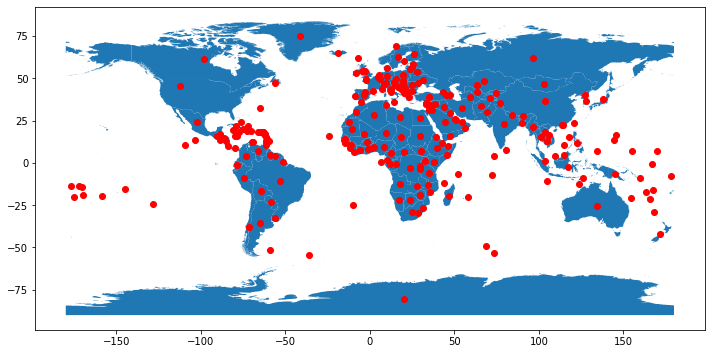

In [35]:
# Visualizar ambos: countries (poligonos) e pontos (centroides)
fig, ax = plt.subplots(figsize=(12,10))
countries.plot(ax=ax)
country_centroids.plot(ax=ax, color='red')

C:\Users\iribarre\Anaconda3\lib\site-packages\geopandas\plotting.py:51: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


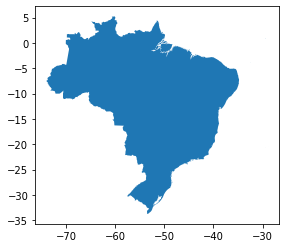

In [37]:
# Selecione apenas o país que você deseja
brazil = countries[countries['NAME'] == 'Brazil']
brazil.plot()

In [41]:
#checar o sistema de coordenada geográfica, que neste caso está em graus
brazil.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [38]:
brazil_centroid = brazil.geometry.centroid
brazil_centroid.head()

C:\Users\iribarre\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.


45    POINT (-53.09248 -10.78086)
dtype: geometry

C:\Users\iribarre\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  
C:\Users\iribarre\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\iribarre\Anaconda3\lib\site-packages\geopandas\plotting.py:51: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


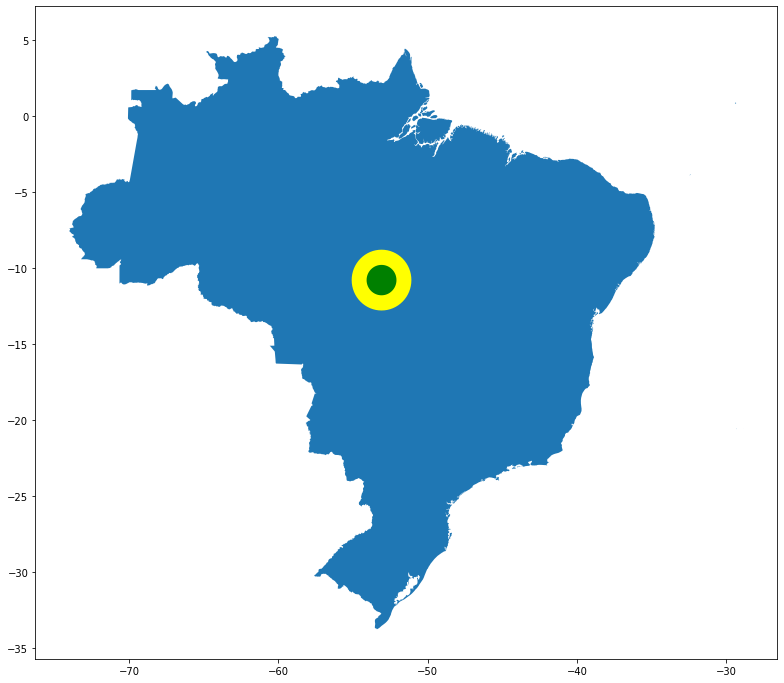

In [46]:
# vamos usar o buffer para 1 e 2 graus e visualizar eles
brazil_centroid_1degree = brazil_centroid.buffer(1)
brazil_centroid_2degree = brazil_centroid.buffer(2)

fig, ax = plt.subplots(figsize=(18,12))
brazil.plot(ax=ax)
brazil_centroid_2degree.plot(ax=ax, color='yellow')
brazil_centroid_1degree.plot(ax=ax, color='green')
plt.show()

In [52]:
#Projete para metros baseado na crs (sistema de coordenadas geográficas) 3395
brazil_centroid_projected = brazil.centroid.to_crs({'init': 'epsg:3395'})
brazil_projected = brazil.to_crs({'init': 'epsg:3395'})
brazil_centroid_projected.crs

C:\Users\iribarre\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  
C:\Users\iribarre\Anaconda3\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


<Projected CRS: EPSG:3395>
Name: WGS 84 / World Mercator
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: World between 80°S and 84°N.
- bounds: (-180.0, -80.0, 180.0, 84.0)
Coordinate Operation:
- name: World Mercator
- method: Mercator (variant A)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

C:\Users\iribarre\Anaconda3\lib\site-packages\geopandas\plotting.py:51: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


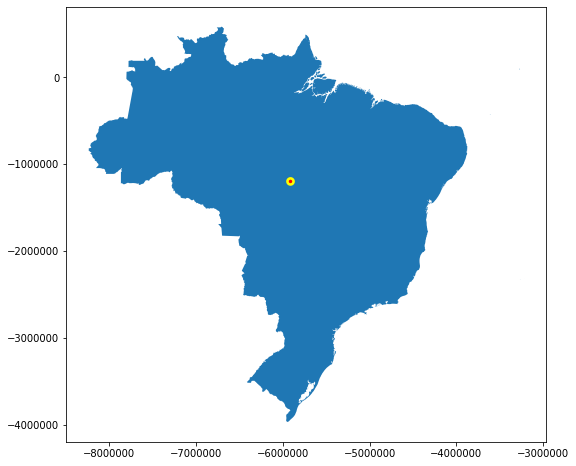

In [56]:
#Criar um buffer de 20km e 50km
brazil_centroid_20km = brazil_centroid_projected.buffer(20000)
brazil_centroid_50km = brazil_centroid_projected.buffer(50000)

#Visualizar os buffers
fig, ax = plt.subplots(figsize=(10,8))
brazil_projected.plot(ax=ax)
brazil_centroid_50km.plot(ax=ax, color='yellow')
brazil_centroid_20km.plot(ax=ax, color='red')

plt.show()

# Overlay Analysis (Análise por Sobreposição)

* use .overlay para determinar o dataset para se sobrepor a outros

--
* Union (União): Todos os dados
* Intersection (Intereseção): Dados que se sobrepõem
* Difference (Diferença): Dados que não se sobrepõem

In [111]:
# Adicione mais biblioteca faltante no notebook
from pyproj import Proj

In [89]:
# Vamos ver qual dado está disponível em Geopandas
gpd.datasets.available

['naturalearth_cities', 'naturalearth_lowres', 'nybb']

In [131]:
# Ler do dataset em Geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
capitals = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))

capitals.head()

,name,geometry
0,Vatican City,POINT (12.45339 41.90328)
1,San Marino,POINT (12.44177 43.93610)
2,Vaduz,POINT (9.51667 47.13372)
3,Luxembourg,POINT (6.13000 49.61166)
4,Palikir,POINT (158.14997 6.91664)


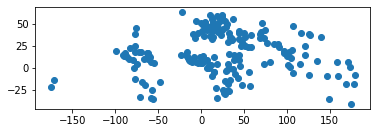

In [91]:
capitals.plot()

In [94]:
# Vejas opções de continentes
continent = world['continent'].unique()
continent

array(['Oceania', 'Africa', 'North America', 'Asia', 'South America',
       'Europe', 'Seven seas (open ocean)', 'Antarctica'], dtype=object)

In [96]:
# Selecione a América Latina
south_america = world[world['continent'] == 'South America']
south_america = south_america[['geometry', 'name']]
south_america.head()

,geometry,name
9,"MULTIPOLYGON (((-68.63401 -52.63637, -68.25000...",Argentina
10,"MULTIPOLYGON (((-68.63401 -52.63637, -68.63335...",Chile
20,"POLYGON ((-61.20000 -51.85000, -60.00000 -51.2...",Falkland Is.
28,"POLYGON ((-57.62513 -30.21629, -56.97603 -30.1...",Uruguay
29,"POLYGON ((-53.37366 -33.76838, -53.65054 -33.2...",Brazil


C:\Users\iribarre\Anaconda3\lib\site-packages\geopandas\plotting.py:51: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


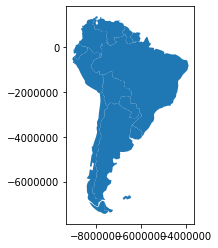

In [101]:
south_america.plot()

In [99]:
# Projetar par crs que usa metros como medida de distância
south_america = south_america.to_crs("epsg:3395")
capitals = capitals.to_crs('epsg:3395')
capitals.crs

<Projected CRS: EPSG:3395>
Name: WGS 84 / World Mercator
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: World between 80°S and 84°N.
- bounds: (-180.0, -80.0, 180.0, 84.0)
Coordinate Operation:
- name: World Mercator
- method: Mercator (variant A)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [102]:
# Faça um buffer de 500km
capitals['geometry']= capitals.buffer(500000)
capitals.head()

,name,geometry
0,Vatican City,"POLYGON ((1886304.649 5117957.424, 1883897.012..."
1,San Marino,"POLYGON ((1885011.519 5425900.277, 1882603.882..."
2,Vaduz,"POLYGON ((1559390.800 5932596.001, 1556983.163..."
3,Luxembourg,"POLYGON ((1182388.791 6346728.171, 1179981.154..."
4,Palikir,"POLYGON ((18105174.611 766692.137, 18102766.97..."


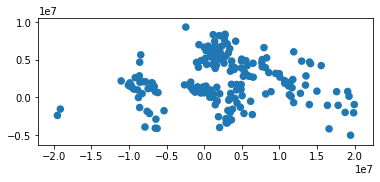

In [103]:
capitals.plot()

Intersection (Interseção)

C:\Users\iribarre\Anaconda3\lib\site-packages\geopandas\plotting.py:51: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


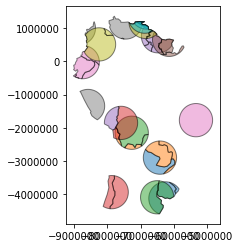

In [107]:
# Crie um cruzamento de capitais que interecedem dentro de 500km de distância
south_america_cruzamento = gpd.overlay(south_america, capitals, how='intersection')
south_america_cruzamento.plot(alpha=0.5, edgecolor='k', cmap='tab10')

Difference (Diferença)

C:\Users\iribarre\Anaconda3\lib\site-packages\geopandas\plotting.py:51: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


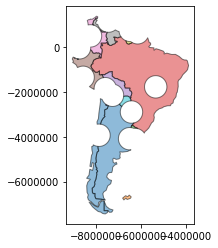

In [110]:
# Crie o oposto agora: Áreas onde as capitais não intercedem. 
south_america_periferia = gpd.overlay(south_america, capitals, how='difference')
south_america_periferia.plot(alpha=0.5, edgecolor='k', cmap='tab10') 

# Nearest Analysis (Análise mais Próxima)

* Use .unary_union para retornar a geometria contendo a união de todas as geometrias no GeoSeries
* Use .nearest_point para calcular a geometria mais próxima
* Use .set_geometry para configurar a geometria do geodataframe
* Use .apply para aplicar a função criada

In [116]:
# Instalar biblioteca faltante
!pip install folium

In [118]:
# Adcionar bibliotecas faltante no notebook
import folium
from shapely.ops import nearest_points
from shapely.geometry import LineString

In [122]:
# Ler arquivo bike
points = pd.read_csv(r'C:\Users\iribarre\Downloads\3+-+Spatial+Operations\data\bike_data\points.csv')
points.head()

,id,xcoord,ycoord
0,1,-87.675992,41.969792
1,2,-87.676702,41.956395
2,3,-87.601501,41.805379
3,4,-87.616656,41.858263
4,5,-87.706869,41.963010


In [123]:
# Ler arquivo station
stations = pd.read_csv(r'C:\Users\iribarre\Downloads\3+-+Spatial+Operations\data\bike_data\stations.csv')
stations.head()

,id,name,dpcapacity,xcoord,ycoord
0,5,State St & Harrison St,19,-87.627739,41.873958
1,13,Wilton Ave & Diversey Pkwy,19,-87.652681,41.932500
2,14,Morgan St & 18th St,15,-87.651073,41.858086
3,15,Racine Ave & 19th St,15,-87.656471,41.856453
4,16,Wood St & North Ave,15,-87.672516,41.910329


In [132]:
# Criar função para converter os dois datasets em GeodataFrame
def create_gdf(df, x='xcoord', y='ycoord'):
    return gpd.GeoDataFrame(df,geometry=gpd.points_from_xy(df[x], df[y]), crs= 'epsg:4326')

stations_gdf = create_gdf(stations)
points_gdf = create_gdf(points)

stations.head()

,id,name,dpcapacity,xcoord,ycoord,geometry
0,5,State St & Harrison St,19,-87.627739,41.873958,POINT (-87.62774 41.87396)
1,13,Wilton Ave & Diversey Pkwy,19,-87.652681,41.932500,POINT (-87.65268 41.93250)
2,14,Morgan St & 18th St,15,-87.651073,41.858086,POINT (-87.65107 41.85809)
3,15,Racine Ave & 19th St,15,-87.656471,41.856453,POINT (-87.65647 41.85645)
4,16,Wood St & North Ave,15,-87.672516,41.910329,POINT (-87.67252 41.91033)


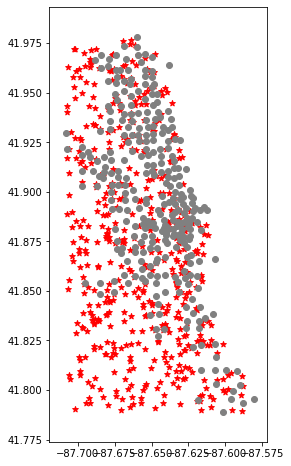

In [138]:
# Visualizar points como estrelas vermelhas e stations como pontos cinzas 
fig, ax = plt.subplots(figsize=(10,8))
points_gdf.plot(ax=ax, color='Red', marker= '*')
stations_gdf.plot(ax=ax, color='grey')

plt.show()

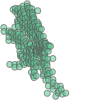

In [135]:
# A função .unary serve para unir todas as geometrias
stations_gdf['geometry'].unary_union

Calcular a distância mais próxima entre as estações e os pontos escolhidos aleatóriamente

In [147]:
# Criar uma função para calcular a maior aproximação entre points e stations
def calculate_nearest(row, destination, val, col='geometry'):
    dest_unary = destination['geometry'].unary_union    
    nearest_geom = nearest_points(row[col], dest_unary)  #"dot loc" encontra a geometria correspondente (points) para unir com a geometria de destino (station)
    match_geom = destination.loc[destination.geometry == nearest_geom[1]]
    match_value = match_geom[val].to_numpy()[0]
    return match_value #retorna o valor da estação (station) mais próxima do ponto (point)

In [149]:
# Aplicar a função, retornando as linhas mais próximas das estações
points_gdf['nearest_geom'] = points_gdf.apply(calculate_nearest, destination=stations_gdf, val='geometry', axis=1)
points_gdf.head(2)

,id,xcoord,ycoord,geometry,nearest_geom
0,1,-87.675992,41.969792,POINT (-87.67599 41.96979),POINT (-87.674237 41.96909)
1,2,-87.676702,41.956395,POINT (-87.67670 41.95640),POINT (-87.679259 41.955927)


In [150]:
# Aplicar a função, retornando os nomes das estações mais próximas
points_gdf['nearest_station'] = points_gdf.apply(calculate_nearest, destination=stations_gdf, val='name', axis=1)
points_gdf.head(2)

,id,xcoord,ycoord,geometry,nearest_geom,nearest_station
0,1,-87.675992,41.969792,POINT (-87.67599 41.96979),POINT (-87.674237 41.96909),Ravenswood Ave & Lawrence Ave
1,2,-87.676702,41.956395,POINT (-87.67670 41.95640),POINT (-87.679259 41.955927),Lincoln Ave & Belle Plaine Ave


In [156]:
# Combinar os pontos para ciar uma linha conectando cada ponto próximo um do outro
points_gdf['line'] = points_gdf.apply(lambda row: LineString([row['geometry'], row['nearest_geom']]), axis=1)
points_gdf.head()                                                           

,id,xcoord,ycoord,geometry,nearest_geom,nearest_station,line
0,1,-87.675992,41.969792,POINT (-87.67599 41.96979),POINT (-87.674237 41.96909),Ravenswood Ave & Lawrence Ave,LINESTRING (-87.6759921188193 41.9697924176359...
1,2,-87.676702,41.956395,POINT (-87.67670 41.95640),POINT (-87.679259 41.955927),Lincoln Ave & Belle Plaine Ave,LINESTRING (-87.6767023973826 41.9563952204838...
2,3,-87.601501,41.805379,POINT (-87.60150 41.80538),POINT (-87.59938299999999 41.809835),Greenwood Ave & 47th St,LINESTRING (-87.601501134953 41.80537852054139...
3,4,-87.616656,41.858263,POINT (-87.61666 41.85826),POINT (-87.619407 41.857611),Calumet Ave & 18th St,LINESTRING (-87.6166556820615 41.8582625122995...
4,5,-87.706869,41.963010,POINT (-87.70687 41.96301),POINT (-87.688487 41.966555),Western Ave & Leland Ave,LINESTRING (-87.7068694739994 41.9630104417897...


In [158]:
# Mesmo criando uma linha, quando chamamos o dado ainda aparecem em pontos
points_gdf.geometry

0      POINT (-87.67599 41.96979)
1      POINT (-87.67670 41.95640)
2      POINT (-87.60150 41.80538)
3      POINT (-87.61666 41.85826)
4      POINT (-87.70687 41.96301)
                  ...            
493    POINT (-87.66327 41.92158)
494    POINT (-87.68038 41.84712)
495    POINT (-87.65710 41.92564)
496    POINT (-87.66918 41.97626)
497    POINT (-87.66973 41.89712)
Name: geometry, Length: 498, dtype: geometry

In [160]:
# Alterar os pontos para linhas usando .set_geometry
line_gdf = points_gdf[['id', 'nearest_station', 'line']].set_geometry('line')
line_gdf.geometry

0      LINESTRING (-87.67599 41.96979, -87.67424 41.9...
1      LINESTRING (-87.67670 41.95640, -87.67926 41.9...
2      LINESTRING (-87.60150 41.80538, -87.59938 41.8...
3      LINESTRING (-87.61666 41.85826, -87.61941 41.8...
4      LINESTRING (-87.70687 41.96301, -87.68849 41.9...
                             ...                        
493    LINESTRING (-87.66327 41.92158, -87.66309 41.9...
494    LINESTRING (-87.68038 41.84712, -87.68511 41.8...
495    LINESTRING (-87.65710 41.92564, -87.65840 41.9...
496    LINESTRING (-87.66918 41.97626, -87.66837 41.9...
497    LINESTRING (-87.66973 41.89712, -87.66775 41.8...
Name: line, Length: 498, dtype: geometry

In [162]:
# Converter crs para mercartor (epsg:4326)
line_gdf.crs = 'epsg:4326'

In [163]:
points_gdf.drop(['nearest_geom', 'line'], axis=1, inplace=True)
points_gdf.head()

,id,xcoord,ycoord,geometry,nearest_station
0,1,-87.675992,41.969792,POINT (-87.67599 41.96979),Ravenswood Ave & Lawrence Ave
1,2,-87.676702,41.956395,POINT (-87.67670 41.95640),Lincoln Ave & Belle Plaine Ave
2,3,-87.601501,41.805379,POINT (-87.60150 41.80538),Greenwood Ave & 47th St
3,4,-87.616656,41.858263,POINT (-87.61666 41.85826),Calumet Ave & 18th St
4,5,-87.706869,41.963010,POINT (-87.70687 41.96301),Western Ave & Leland Ave


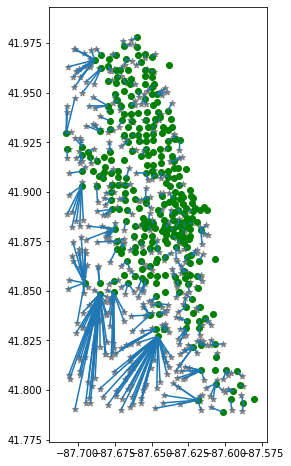

In [172]:
# Visualizar os três datasets: points, stations e nearest_lines
fig, ax = plt.subplots(figsize=(10,8))
points_gdf.plot(ax=ax, color='gray', marker= '*')
stations_gdf.plot(ax=ax, color='green')
line_gdf.plot(ax=ax)

plt.show()